In [38]:
!nvidia-smi

Fri Feb 17 13:00:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   30C    P0    43W / 163W |      3MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup environment

In [2]:
# install dependents
# !pip install -q monailabel-weekly
# !pip install -q monai
# !pip uninstall opencv-contrib-python -y
# !pip install opencv-python==4.1.2.30 opencv-contrib-python==4.1.2.30
# !pip install -q timm
# !pip install -U -q openmim
# !mim install -U -q mmcv-full
# !pip install -q ml_collections

In [2]:
# mount driver
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/CardiacSeg/UNETCNX/CHGH
# sync python module
%load_ext autoreload
%autoreload 2

## Infer

In [3]:
workspace_dir = '/nfs/Workspace/CardiacSeg'

import os
import sys
from pathlib import PurePath
sys.path.append(workspace_dir)

import pandas as pd

from monai.transforms import (
   Compose,
   AddChanneld,
   EnsureChannelFirstd,
   LoadImaged,
   Orientationd,
   SqueezeDimd,
   LoadImage
)

from data_utils.chgh_dataset import get_data_dicts
from data_utils.utils import get_pid_by_file
from data_utils.visualization import show_img_lbl, show_img_lbl_pred, show_img_lbl_preds, show_img_lbl_preds_overlap

from expers.infer_utils import get_tune_model_dir, get_data_path, get_pred_path

model_name = 'unetcnx_x0'
data_name = 'chgh'
sub_data_dir_name = 'dataset_2'
exp_name = 't_1' #'exp_2_2_1_x0' #'exp_2_2_x0_t6'
data_dict_file_name = 'exp_2_2.json'

tune_mode = 'train' #'train'


root_exp_dir = os.path.join(
    workspace_dir, 
    'exps',
    model_name,
    data_name,
    'tune_results'
)

root_data_dir = os.path.join(
    workspace_dir, 
    'dataset',
    data_name
)

data_dir = os.path.join(root_data_dir, sub_data_dir_name)


model_dir = get_tune_model_dir(root_exp_dir, exp_name)

best_checkpoint = os.path.join(model_dir, 'best_model.pth')
final_checkpoint = os.path.join(model_dir, 'final_model.pth')
infer_dir = os.path.join(
    workspace_dir, 
    'exps',
    model_name,
    data_name,
    'infers',
    exp_name,
)

print('\nbest model:',best_checkpoint)
print('infer dir:',infer_dir)

pid = 'pid_1000'
data_dict = get_data_path(data_dir, pid)
data_dict['pred'] = get_pred_path(root_exp_dir, exp_name, data_dict['image'])
img_pth = data_dict['image']
lbl_pth = data_dict['label'] 
print(img_pth)
print(lbl_pth)
print(data_dict['pred'])

%cd /nfs/Workspace/CardiacSeg/exps/{model_name}/{data_name}

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading results from /nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/tune_results/t_1...


On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.



Best trial 99998_00000: 
config: {'exp': {'exp': 't_1'}}
tt_dice: 0.8862721
tt_hd95: 3.605551275463989
esc: 0
best log dir: /nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/tune_results/t_1/main_99998_00000_0_exp=exp_t_1_2023-02-09_16-12-50

best model: /nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/tune_results/t_1/main_99998_00000_0_exp=exp_t_1_2023-02-09_16-12-50/models/best_model.pth
infer dir: /nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/infers/t_1
/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz
/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz
/nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/tune_results/infers/t_1/pid_1000.nii.gz
/nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh


In [37]:
!/opt/conda/bin/python /nfs/Workspace/CardiacSeg/expers/chgh/infer.py \
--model_name={model_name} \
--data_dir={data_dir} \
--model_dir={model_dir} \
--infer_dir={infer_dir} \
--checkpoint={best_checkpoint} \
--img_pth={img_pth} \
--lbl_pth={lbl_pth} \
--out_channels=2 \
--a_min=-42 \
--a_max=423 \
--space_x=1.0 \
--space_y=1.0 \
--space_z=1.0 \
--roi_x=128 \
--roi_y=128 \
--roi_z=128 \
--infer_overlap=0.8

On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
cuda is available
model: unetcnx_x0
=> loaded checkpoint '/nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/tune_results/t_1/main_99998_00000_0_exp=exp_t_1_2023-02-09_16-12-50/models/best_model.pth')
infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz'}
<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
infer test time aug:
dice: 0.9006907
hd95: 5.385164807134504
infer test original:
dice: 0.8

## Eval

In [35]:
data_dir = '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06'

# img_pth='/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz'
# lbl_pth='/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_gt.nii.gz'
# pred_pth='/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_unetcnx.nii.gz'

print(data_dir)

/nfs/Workspace/CardiacSeg/dataset/chgh/block_06


In [36]:
# training
!PYTHONPATH=/nfs/Workspace/CardiacSeg /opt/conda/bin/python /nfs/Workspace/CardiacSeg/expers/eval_label.py \
--out_channels=2 \
--a_min=-42 \
--a_max=423 \
--space_x=1.0 \
--space_y=1.0 \
--space_z=1.0 \
--data_dir={data_dir}
# --img_pth={img_pth} \
# --lbl_pth={lbl_pth} \
# --pred_pth={pred_pth} \

cuda is available
/nfs/Workspace/CardiacSeg/dataset/chgh/block_06
infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_gt.nii.gz', 'pred': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_pwsb.nii.gz'}
<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
pred name: pwsb
dice: 0.813605
hd95: 9.1104335791443

infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_gt.nii.gz', 'pred': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_t.nii.gz'}
pred name: t
dice: 0.776614
hd95: 17.291616465790582

infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/blo

# Summarize exp results

## summartize data dict and dice, save out dir

In [11]:
import os
from pprint import pprint
import shutil

from expers.infer_utils import get_data_path, get_pred_path, get_tune_dir, get_eval_csv_path, get_dice_val


pid = 'pid_1000'
root_dir = '/nfs/Workspace/CardiacSeg/exps'
exp_name = 't_1'
model_names = ['unet3d', 'attention_unet', 'cotr', 'unetr', 'swinunetr', 'unetcnx_x0']
exp_names = [exp_name for _ in model_names] 
root_exp_dirs = [os.path.join(root_dir, m, 'chgh') for m in model_names]

is_save_output = False
out_dir = './output'
out_infer_dir = os.path.join(out_dir, 'infers')
out_eval_dir = os.path.join(out_dir, 'evals')
os.makedirs(os.path.join(out_infer_dir), exist_ok=True)
os.makedirs(os.path.join(out_eval_dir), exist_ok=True)


data_dict = get_data_path(data_dir, pid)
dice_dict = {}
for exp_name, model_name, root_exp_dir in zip(exp_names, model_names, root_exp_dirs):
    key = f'{model_name}'
    
    # add pred path to data dict
    data_dict[key] = get_pred_path(root_exp_dir, exp_name, data_dict['image'])

    # read dice by pid
    tune_dir = get_tune_dir(os.path.join(root_exp_dir, 'tune_results', exp_name))
    csv_pth = get_eval_csv_path(tune_dir)
    dice_dict[key] = get_dice_val(csv_pth, pid)
    
    if is_save_output:
        # copy pred file
        shutil.copyfile(data_dict[key], os.path.join(out_infer_dir, f'{model_name}_{pid}.nii.gz'))

        # copy csv file
        shutil.copyfile(csv_pth, os.path.join(out_eval_dir, f'{model_name}_best_model_eval.csv'))


pprint(data_dict)
pprint(dice_dict)

{'attention_unet': '/nfs/Workspace/CardiacSeg/exps/attention_unet/chgh/infers/t_1/pid_1000.nii.gz',
 'cotr': '/nfs/Workspace/CardiacSeg/exps/cotr/chgh/infers/t_1/pid_1000.nii.gz',
 'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz',
 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz',
 'swinunetr': '/nfs/Workspace/CardiacSeg/exps/swinunetr/chgh/infers/t_1/pid_1000.nii.gz',
 'unet3d': '/nfs/Workspace/CardiacSeg/exps/unet3d/chgh/infers/t_1/pid_1000.nii.gz',
 'unetcnx_x0': '/nfs/Workspace/CardiacSeg/exps/unetcnx_x0/chgh/infers/t_1/pid_1000.nii.gz',
 'unetr': '/nfs/Workspace/CardiacSeg/exps/unetr/chgh/infers/t_1/pid_1000.nii.gz'}
{'attention_unet': 0.8971921,
 'cotr': 0.8851475,
 'swinunetr': 0.89721036,
 'unet3d': 0.8692783,
 'unetcnx_x0': 0.9069045,
 'unetr': 0.8913427}


## load out dir

In [10]:
import os
from pprint import pprint
import shutil

from expers.infer_utils import get_data_path, get_pred_path, get_tune_dir, get_eval_csv_path, get_dice_val

out_dir = './output'
out_infer_dir = os.path.join(out_dir, 'infers')
out_eval_dir = os.path.join(out_dir, 'evals')


data_dict = get_data_path(data_dir, pid)
dice_dict = {}
model_names = ['unet3d', 'attention_unet', 'cotr', 'unetr', 'swinunetr', 'unetcnx_x0']
for model_name in model_names:
    pred_path = os.path.join(out_infer_dir, f'{model_name}_{pid}.nii.gz')
    data_dict[model_name] = pred_path
    
    csv_pth = os.path.join(out_eval_dir, f'{model_name}_best_model_eval.csv')
    dice_dict[model_name] = get_dice_val(csv_pth, pid)

pprint(data_dict)
pprint(dice_dict)

{'attention_unet': './output/infers/attention_unet_pid_1000.nii.gz',
 'cotr': './output/infers/cotr_pid_1000.nii.gz',
 'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz',
 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz',
 'swinunetr': './output/infers/swinunetr_pid_1000.nii.gz',
 'unet3d': './output/infers/unet3d_pid_1000.nii.gz',
 'unetcnx_x0': './output/infers/unetcnx_x0_pid_1000.nii.gz',
 'unetr': './output/infers/unetr_pid_1000.nii.gz'}
{'attention_unet': 0.8971921,
 'cotr': 0.8851475,
 'swinunetr': 0.89721036,
 'unet3d': 0.8692783,
 'unetcnx_x0': 0.9069045,
 'unetr': 0.8913427}


In [19]:
# !rm -rf output

In [17]:
# !zip -r output.zip output

  adding: output/ (stored 0%)
  adding: output/infers/ (stored 0%)
  adding: output/infers/unet3d_pid_1000.nii.gz (deflated 45%)
  adding: output/infers/attention_unet_pid_1000.nii.gz (deflated 46%)
  adding: output/infers/cotr_pid_1000.nii.gz (deflated 47%)
  adding: output/infers/unetr_pid_1000.nii.gz (deflated 48%)
  adding: output/infers/swinunetr_pid_1000.nii.gz (deflated 50%)
  adding: output/infers/unetcnx_x0_pid_1000.nii.gz (deflated 51%)
  adding: output/evals/ (stored 0%)
  adding: output/evals/unet3d_best_model_eval.csv (deflated 19%)
  adding: output/evals/attention_unet_best_model_eval.csv (deflated 15%)
  adding: output/evals/cotr_best_model_eval.csv (deflated 16%)
  adding: output/evals/unetr_best_model_eval.csv (deflated 15%)
  adding: output/evals/swinunetr_best_model_eval.csv (deflated 20%)
  adding: output/evals/unetcnx_x0_best_model_eval.csv (deflated 26%)


# Show exp results

In [12]:
keys = list(data_dict.keys())

loader = Compose([
    LoadImaged(keys=keys),
    EnsureChannelFirstd(keys=keys),
    Orientationd(keys=keys, axcodes='PLI'),
    SqueezeDimd(keys=keys)
])

data = loader(data_dict)

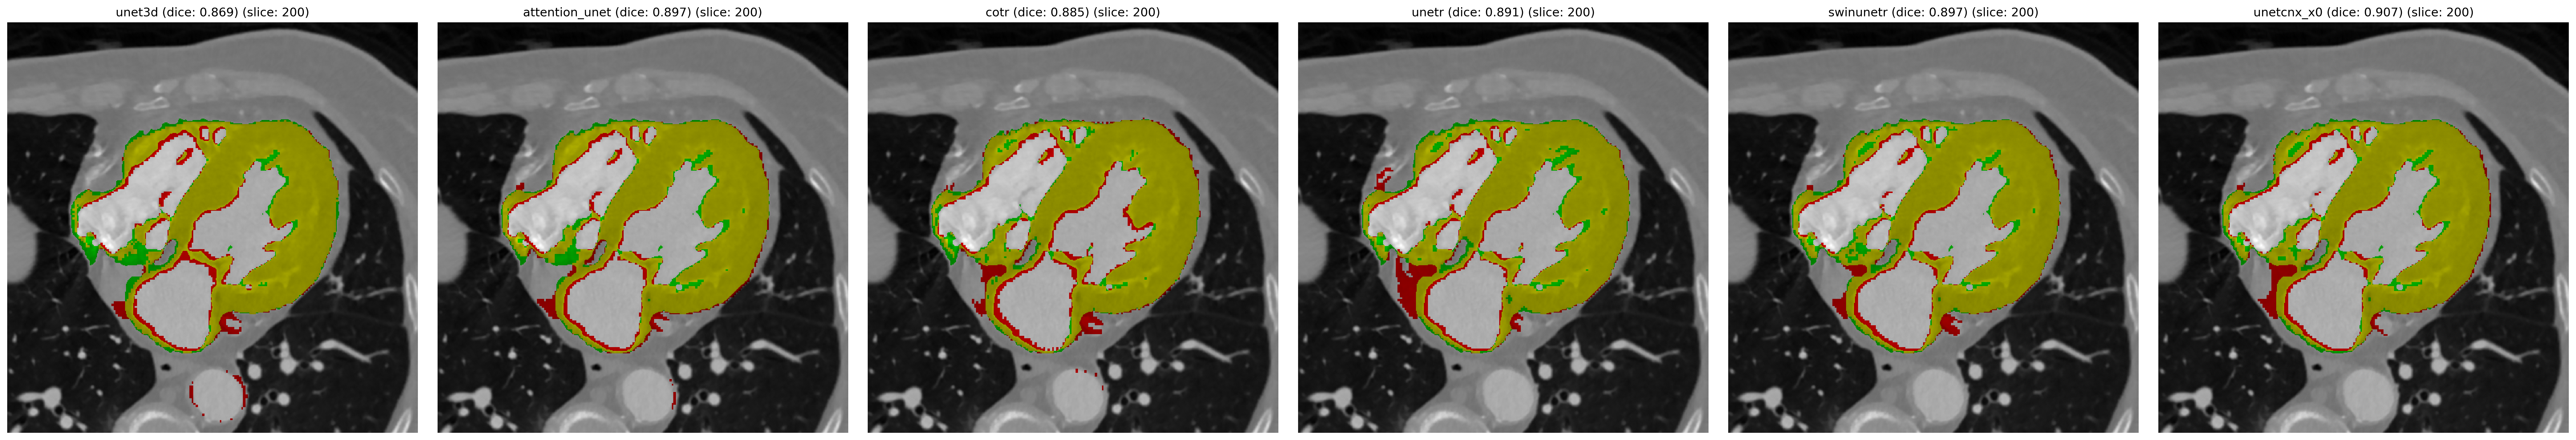

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["figure.facecolor"] = 'none'

from expers.infer_utils import get_img_lbl_preds

num_classes = 2
slice_idxs = [200] #[100,150,200,250]
alpha = 0.5
axis_off = True
#num_img = len(data_dict)
#fig_size = (num_img*5, num_img*len(slice_idxs))
num_img = len(data_dict) - 2 
fig_size = (num_img*6, len(slice_idxs)*6)
show_img = False
show_lbl_dc = True

keys = dice_dict.keys()

pred_titles = [f'{key} (dice: {dice_dict[key]:.3f})'for key in keys]

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='a')

# show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

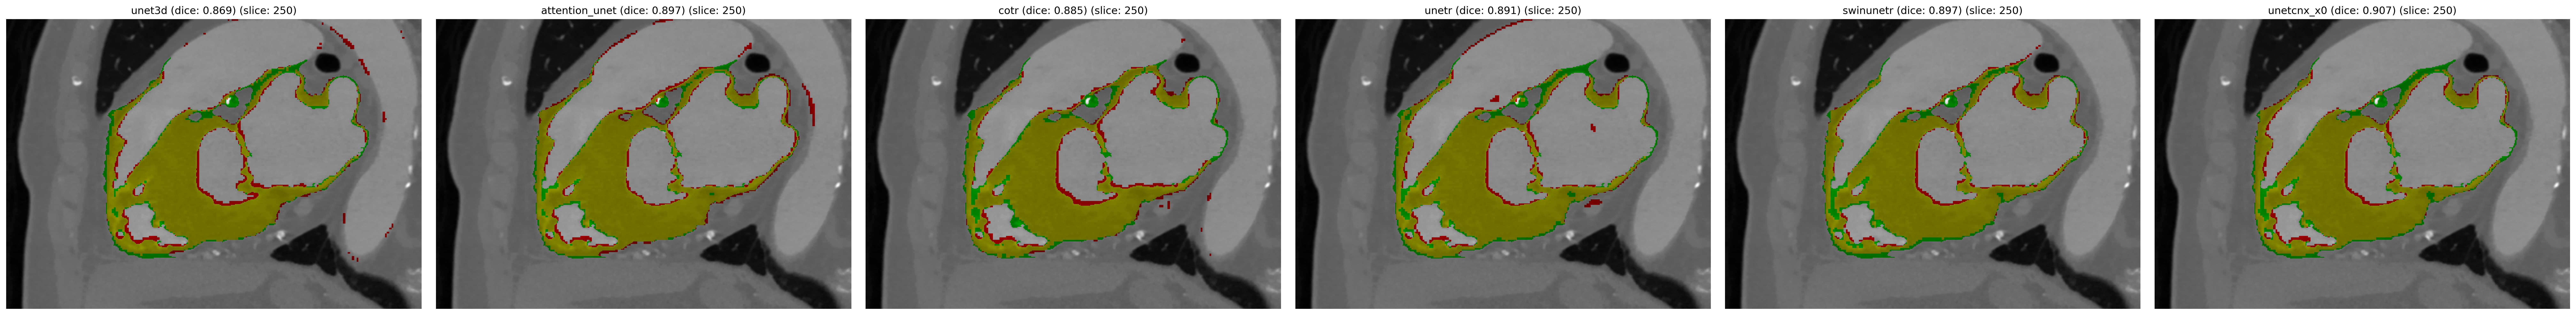

In [15]:
slice_idxs = [250] #[150,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='s', is_trans=True)

#show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

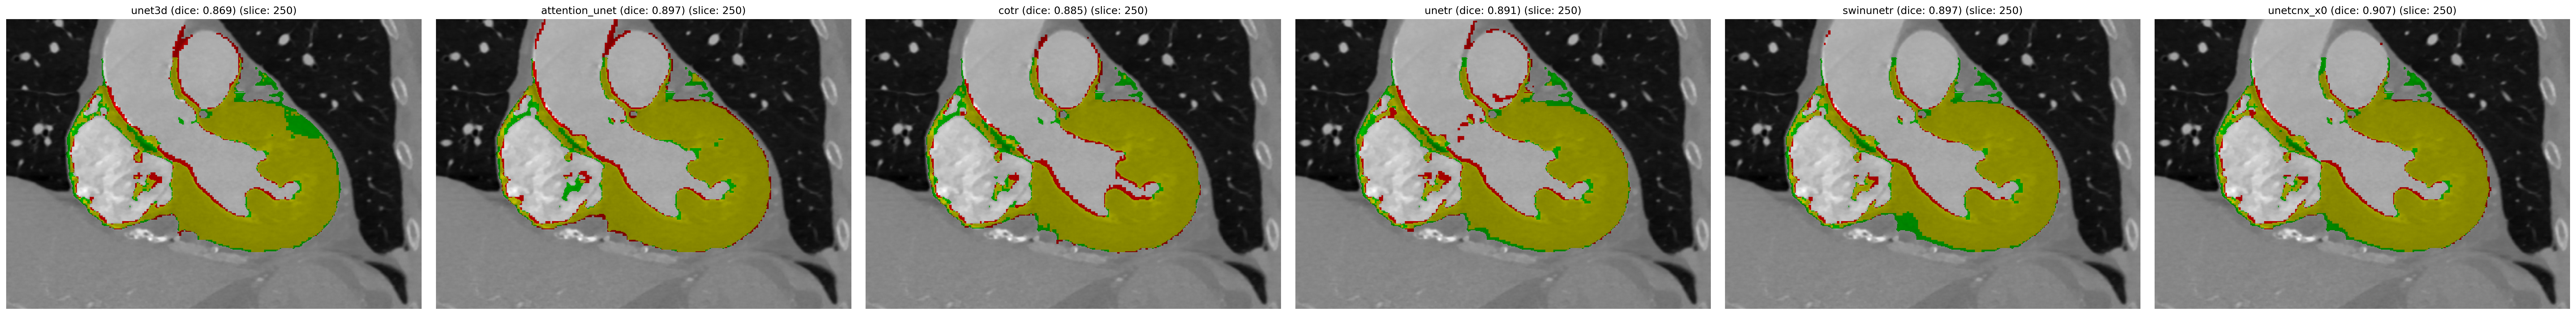

In [28]:
slice_idxs = [250] # [200,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='c', is_trans=True)

#show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc,
)